In [89]:
cd /home/lansdell/projects/synthfeedback

/home/lansdell/projects/synthfeedback


In [90]:
%pylab inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import scipy 
sns.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda/anaconda2/envs/py34/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'axis']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Cartpole RNN with partial observability.

Only observe the position and angle -- requires integration over time to solve the problem

## Backprop

In [41]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'backprop'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

#tags = data['tags']
#metrics = data['metrics']

In [15]:
xs.shape

(5000, 10, 10, 20, 4)

In [42]:
b = 5
nB = 20
theta_d = xs[:,:,:,:,0].reshape(5000,-1, nB)
theta = xs[:,:,:,:,1].reshape(5000,-1,nB)
h_d = xs[:,:,:,:,2].reshape(5000,-1,nB)
h = xs[:,:,:,:,3].reshape(5000,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


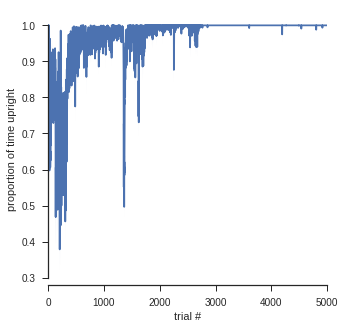

In [43]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
#sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Feedback alignment

In [38]:
#Load BP results
sns.set_style('ticks')
lmbda = 5e-5
var_xi = 0.5
method = 'feedbackalignment'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']

In [21]:
xs.shape

(5000, 10, 10, 20, 4)

In [39]:
nB = 20
theta_d = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


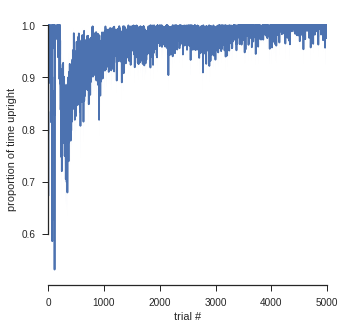

In [40]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(1-np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)

## Node perturbation

In [55]:
#Load BP results
sns.set_style('ticks')
lmbda = 5e-5
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']
N_epochs = 5000

In [56]:
xs.shape

(5000, 10, 10, 20, 4)

In [57]:
nB = 20
theta_d = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


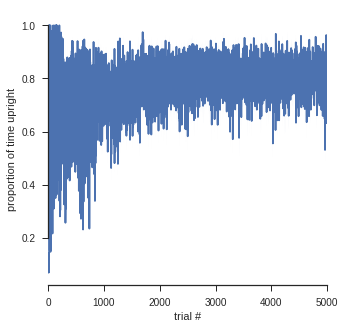

In [58]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time upright')
sns.despine(trim=True)

## Node perturbation with SGD NP

In [60]:
#Load SGD NP results
sns.set_style('ticks')
lmbda = 5e-3
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']
N_epochs = 5000

In [61]:
xs.shape

(5000, 10, 10, 20, 4)

In [62]:
nB = 20
theta_d = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


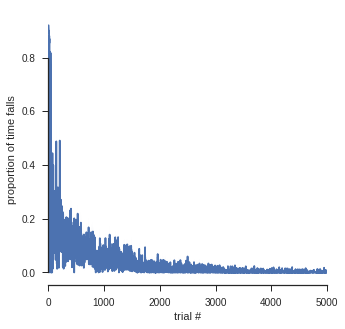

In [64]:
fig, axis = plt.subplots(1,1,figsize = (5,5))
#axis.plot(np.arange(5000),np.mean(theta<np.pi/8, 1))
sns.tsplot(1-np.mean(theta<np.pi/8, 1).T, ax = axis, ci=68)
axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)

## Plot all combined

In [65]:
#Load SGD NP results
sns.set_style('ticks')
lmbda = 5e-3
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']
N_epochs = 5000
nB = 20

theta_d_np = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta_np = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d_np = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h_np = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

In [68]:
#Load FA results
sns.set_style('ticks')
lmbda = 5e-5
var_xi = 0.5
method = 'feedbackalignment'
learning_rate = 1e-3
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)
xs = data['xs']
params = data['params']

theta_d_fa = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta_fa = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d_fa = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h_fa = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

In [69]:
#Load BP results
sns.set_style('ticks')

lmbda = 5e-5
var_xi = 0.5
method = 'backprop'
learning_rate = 1e-3

#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs/%s_learning_rate_%f_lmbda_%f_varxi_%f.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_bp = xs[:,:,:,:,0].reshape(N_epochs,-1, nB)
theta_bp = xs[:,:,:,:,1].reshape(N_epochs,-1,nB)
h_d_bp = xs[:,:,:,:,2].reshape(N_epochs,-1,nB)
h_bp = xs[:,:,:,:,3].reshape(N_epochs,-1,nB)

In [86]:
bp_fallrate.shape

(20, 5000)

/opt/anaconda/miniconda2/envs/py34/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


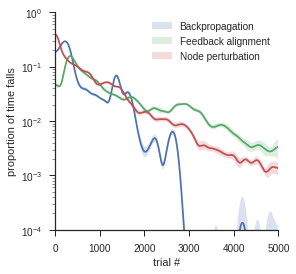

In [111]:
fig, axis = plt.subplots(1,1,figsize = (4,4))

bp_fallrate = 1-np.mean(theta_bp<np.pi/8, 1).T
fa_fallrate = 1-np.mean(theta_fa<np.pi/8, 1).T
np_fallrate = 1-np.mean(theta_np<np.pi/8, 1).T

bp_fallrate_smooth = scipy.ndimage.filters.gaussian_filter1d(bp_fallrate, 75, axis=1)
fa_fallrate_smooth = scipy.ndimage.filters.gaussian_filter1d(fa_fallrate, 75, axis=1)
np_fallrate_smooth = scipy.ndimage.filters.gaussian_filter1d(np_fallrate, 75, axis=1)

sns.tsplot(bp_fallrate_smooth, ax = axis, color = 'C0', ci = 95)
sns.tsplot(fa_fallrate_smooth, ax = axis, color = 'C1', ci = 95)
sns.tsplot(np_fallrate_smooth, ax = axis, color = 'C2', ci = 95)

axis.set_xlabel('trial #')
axis.set_xlim([0, 5000])
axis.set_yscale('log')
axis.set_ylim([1e-4, 1])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)
axis.legend(['Backpropagation', 'Feedback alignment', 'Node perturbation'])
#plt.savefig('./figures/fig_5_cartpole.pdf')

In [115]:
#Final values for each:
print("BP final fall rate: %f"%np.mean(bp_fallrate_smooth, 0)[-1])
print("FA final fall rate: %f"%np.mean(fa_fallrate_smooth, 0)[-1])
print("NP final fall rate: %f"%np.mean(np_fallrate_smooth, 0)[-1])

BP final fall rate: 0.000040
FA final fall rate: 0.003339
NP final fall rate: 0.001369


## Multiple runs

In [23]:
cd /home/lansdell/projects/synthfeedback/

/home/lansdell/projects/synthfeedback


In [44]:
def smooth(y, box_pts=50):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [29]:
#Load BP results
lmbda = 5e-3
var_xi = 0.01
method = 'backprop'
learning_rate = 1e-3
N_epochs = 5000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_bp = xs[:,:,:,:,:,0].reshape(5, N_epochs,-1, nB)
theta_bp = xs[:,:,:,:,:,1].reshape(5, N_epochs,-1,nB)
h_d_bp = xs[:,:,:,:,:,2].reshape(5, N_epochs,-1,nB)
h_bp = xs[:,:,:,:,:,3].reshape(5, N_epochs,-1,nB)

In [30]:
theta_bp.shape

(5, 5000, 100, 20)

In [45]:
#Load FA results
lmbda = 5e-3
var_xi = 0.01
method = 'feedbackalignment'
learning_rate = 1e-3
N_epochs = 5000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_fa = xs[:,:,:,:,:,0].reshape(5, N_epochs,-1, nB)
theta_fa = xs[:,:,:,:,:,1].reshape(5, N_epochs,-1,nB)
h_d_fa = xs[:,:,:,:,:,2].reshape(5, N_epochs,-1,nB)
h_fa = xs[:,:,:,:,:,3].reshape(5, N_epochs,-1,nB)

In [47]:
#Load NP results
lmbda = 5e-3
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
N_epochs = 5000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_np = xs[:,:,:,:,:,0].reshape(5, N_epochs,-1, nB)
theta_np = xs[:,:,:,:,:,1].reshape(5, N_epochs,-1,nB)
h_d_np = xs[:,:,:,:,:,2].reshape(5, N_epochs,-1,nB)
h_np = xs[:,:,:,:,:,3].reshape(5, N_epochs,-1,nB)

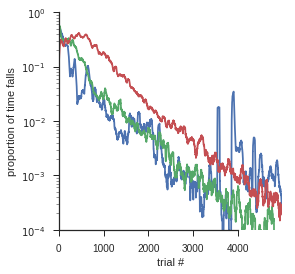

In [50]:
fig, axis = plt.subplots(1,1,figsize = (4,4))

threshold = np.pi/6

bp_fallrates = 1-np.mean(theta_bp[:,:,:,:]<threshold, 2)
bp_fallrates = np.mean(bp_fallrates,0)
bp_fallrates = smooth(np.mean(bp_fallrates,1))

fa_fallrates = 1-np.mean(theta_fa[:,:,:,:]<threshold, 2)
fa_fallrates = np.mean(fa_fallrates,0)
fa_fallrates = smooth(np.mean(fa_fallrates,1))

np_fallrates = 1-np.mean(theta_np[:,:,:,:]<threshold, 2)
np_fallrates = np.mean(np_fallrates,0)
np_fallrates = smooth(np.mean(np_fallrates,1))

sns.tsplot(bp_fallrates, ax = axis, color = 'C0', ci = 95)
sns.tsplot(fa_fallrates, ax = axis, color = 'C1', ci = 95)
sns.tsplot(np_fallrates, ax = axis, color = 'C2', ci = 95)

axis.set_xlabel('trial #')
axis.set_yscale('log')
axis.set_ylim([1e-4, 1])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)

The methods are the same! Need a more challenging task. How about one with delayed actions?

## Multiple runs with delayed actions

In [23]:
cd /home/lansdell/projects/synthfeedback/

/home/lansdell/projects/synthfeedback


In [112]:
def smooth(y, box_pts=50):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [92]:
#Load BP results
lmbda = 5e-3
var_xi = 0.01
method = 'backprop'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp_delayed/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']
Nruns = 5
theta_d_bp = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_bp = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_bp = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_bp = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [93]:
theta_bp.shape

(5, 10000, 100, 20)

In [94]:
#Load FA results
lmbda = 5e-3
var_xi = 0.01
method = 'feedbackalignment'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp_delayed/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_fa = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_fa = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_fa = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_fa = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [106]:
#Load NP results
lmbda = 5e-3
var_xi = 0.01
method = 'nodepert'
learning_rate = 1e-3
N_epochs = 10000
nB = 20
#Load data from script
fn_in = './experiments/cartpole_rnn_partialobs_sgdnp/%s_learning_rate_%f_lmbda_%f_varxi_%f_multipleruns.npz'%(method, learning_rate, lmbda, var_xi)
with open(fn_in, 'rb') as f:
    data = pickle.load(f)

xs = data['xs']
params = data['params']

theta_d_np = xs[:,:,:,:,:,0].reshape(Nruns, N_epochs,-1, nB)
theta_np = xs[:,:,:,:,:,1].reshape(Nruns, N_epochs,-1,nB)
h_d_np = xs[:,:,:,:,:,2].reshape(Nruns, N_epochs,-1,nB)
h_np = xs[:,:,:,:,:,3].reshape(Nruns, N_epochs,-1,nB)

In [110]:
theta_bp.shape
bp_fallrates = 1-np.mean(theta_bp[:,:,:,:]<threshold, 2)
bp_fallrates = np.mean(bp_fallrates, 2)
bp_fallrates.shape

(5, 10000)

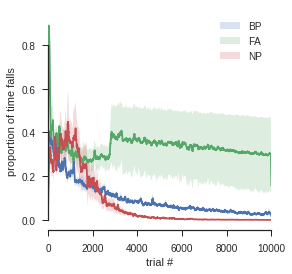

In [115]:
fig, axis = plt.subplots(1,1,figsize = (4,4))

threshold = np.pi/6

bp_fallrates = 1-np.mean(theta_bp[:,:,:,:]<threshold, 2)
bp_fallrates = np.mean(bp_fallrates,2)
bp_fallrates = smooth(bp_fallrates)

fa_fallrates = 1-np.mean(theta_fa[:,:,:,:]<threshold, 2)
fa_fallrates = np.mean(fa_fallrates,2)
fa_fallrates = smooth(fa_fallrates)

np_fallrates = 1-np.mean(theta_np[:,:,:,:]<threshold, 2)
np_fallrates = np.mean(np_fallrates,2)
np_fallrates = smooth(np_fallrates)

sns.tsplot(bp_fallrates, ax = axis, color = 'C0', ci = 68)
sns.tsplot(fa_fallrates, ax = axis, color = 'C1', ci = 68)
sns.tsplot(np_fallrates, ax = axis, color = 'C2', ci = 68)

axis.set_xlabel('trial #')
#axis.set_yscale('log')
axis.legend(['BP', 'FA', 'NP'])
axis.set_xlim([0, 10000])
axis.set_ylabel('proportion of time falls')
sns.despine(trim=True)
plt.savefig('./figures/cartpole_partialobs_results_delayed.pdf')